# **Processamento de Linguagem Natural**

## Importações

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import bs4 as bs
import urllib.request
import nltk
import spacy

In [ ]:
!pip install spacy==2.2.3

  Using cached spacy-2.2.3.tar.gz (5.9 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
pln = spacy.load('pt_core_news_sm')
pln

In [ ]:
documento = pln('estou aprendendo processamento de linguagem natural Guarulhos')

In [ ]:
type(documento)

spacy.tokens.doc.Doc

In [ ]:
for token in documento:
  print(token.text, token.pos_)

estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
Guarulhos PROPN


## Lematização e stematização

In [ ]:
for token in documento:
  print(token.text, token.lemma_)

estou estar
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
Guarulhos Guarulhos


In [ ]:
doc = pln('encontrei encontrarão encontraram cursando cursou')

[token.lemma_ for token in doc]


['encontrar', 'encontrar', 'encontrar', 'cursar', 'cursar']

In [ ]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [ ]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [ ]:
for token in documento:
  print(token.text, token.lemma_,stemmer.stem(token.text))

estou estar est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natural natural natur
Guarulhos Guarulhos guarulh


## Carregamento do Texto

In [ ]:
dados = urllib.request.urlopen('https://www.oracle.com/br/artificial-intelligence/what-is-ai/')

b'<!DOCTYPE html>\n<html lang="pt-BR" class="no-js"><!-- start : Framework/Redwood2 -->\n<!-- start : ocom/common/global/components/framework/head -->\n<head>\n<!-- start : ocom/common/global/components/head -->\n<title>O que \xc3\xa9 IA (Intelig\xc3\xaancia Artificial)? | Oracle Brasil</title>\n<meta name="Title" content="O que \xc3\xa9 IA (Intelig\xc3\xaancia Artificial)? | Oracle Brasil">\n<meta name="Description" content="Saiba como a intelig\xc3\xaancia artificial (IA) e o machine learning est\xc3\xa3o sendo usados nas empresas para transformar os neg\xc3\xb3cios. Acesse o site para saber mais!">\n<meta name="Keywords" content="intelig\xc3\xaancia artificial, ia, intelig\xc3\xaancia artificial, ai intelig\xc3\xaancia artificial, machine learning, deep learning, intelig\xc3\xaancia adaptativa\n">\n<meta name="siteid" content="br">\n<meta name="countryid" content="BR">\n<meta name="robots" content="index, follow">\n<meta name="country" content="Brasil">\n<meta name="Language" conten
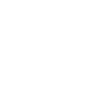

In [ ]:
dados = dados.read()
dados

<!DOCTYPE html>
<html class="no-js" lang="pt-BR"><!-- start : Framework/Redwood2 -->
<!-- start : ocom/common/global/components/framework/head -->
<head>
<!-- start : ocom/common/global/components/head -->
<title>O que é IA (Inteligência Artificial)? | Oracle Brasil</title>
<meta content="O que é IA (Inteligência Artificial)? | Oracle Brasil" name="Title"/>
<meta content="Saiba como a inteligência artificial (IA) e o machine learning estão sendo usados nas empresas para transformar os negócios. Acesse o site para saber mais!" name="Description"/>
<meta content="inteligência artificial, ia, inteligência artificial, ai inteligência artificial, machine learning, deep learning, inteligência adaptativa
" name="Keywords"/>
<meta content="br" name="siteid"/>
<meta content="BR" name="countryid"/>
<meta content="index, follow" name="robots"/>
<meta content="Brasil" name="country"/>
<meta content="pt" name="Language"/>
<meta content="2014-04-24T22:54:05Z" name="Updated Date"/>
<script type="text
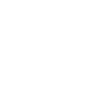

In [ ]:
dados_html = bs.BeautifulSoup(dados,'lxml')
dados_html

In [ ]:
paragrafos = dados_html.find_all('p')

In [ ]:
len(paragrafos)

54

In [ ]:
conteudo = ''
for texto in range(2,len(paragrafos)):
  conteudo += paragrafos[texto].text

In [ ]:
conteudo

'IA tornou-se um termo genérico para aplicações que executam tarefas complexas que antes exigiam interação humana, como se comunicar com clientes online ou jogar xadrez. O termo é frequentemente usado de forma intercambiável com seus subcampos, que incluem machine learning (ML) e deep learning. No entanto, existem diferenças. Por exemplo, o machine learning é centrado na criação de sistemas que aprendam ou melhorem seu desempenho com base nos dados que eles consomem. É importante notar que, embora todo machine learning seja IA, nem toda IA é machine learning.Para obter o valor total da IA, muitas empresas estão fazendo investimentos significativos em equipes de ciência de dados. A ciência de dados combina estatísticas, ciência da computação e conhecimento de negócios para extrair valor de várias fontes de dados.Os desenvolvedores usam inteligência artificial para executar tarefas de maneira mais eficiente, que de outra forma são feitas manualmente, conectar-se com clientes, identificar

In [ ]:
conteudo = conteudo.lower()
conteudo

'ia tornou-se um termo genérico para aplicações que executam tarefas complexas que antes exigiam interação humana, como se comunicar com clientes online ou jogar xadrez. o termo é frequentemente usado de forma intercambiável com seus subcampos, que incluem machine learning (ml) e deep learning. no entanto, existem diferenças. por exemplo, o machine learning é centrado na criação de sistemas que aprendam ou melhorem seu desempenho com base nos dados que eles consomem. é importante notar que, embora todo machine learning seja ia, nem toda ia é machine learning.para obter o valor total da ia, muitas empresas estão fazendo investimentos significativos em equipes de ciência de dados. a ciência de dados combina estatísticas, ciência da computação e conhecimento de negócios para extrair valor de várias fontes de dados.os desenvolvedores usam inteligência artificial para executar tarefas de maneira mais eficiente, que de outra forma são feitas manualmente, conectar-se com clientes, identificar

## Busca em Textos com o spaCy

In [ ]:
pln = spacy.load('pt_core_news_sm')
pln

In [ ]:
encontrar = 'machine learning'

In [ ]:
token_pesquisa = pln(encontrar)

In [ ]:
pln.vocab

In [ ]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)

In [ ]:
matcher.add('SEARCH', None, token_pesquisa)

In [ ]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 41, 43),
 (8661325627334373315, 60, 62),
 (8661325627334373315, 89, 91),
 (8661325627334373315, 308, 310),
 (8661325627334373315, 382, 384),
 (8661325627334373315, 543, 545),
 (8661325627334373315, 563, 565),
 (8661325627334373315, 574, 576),
 (8661325627334373315, 685, 687),
 (8661325627334373315, 742, 744),
 (8661325627334373315, 1463, 1465),
 (8661325627334373315, 1673, 1675),
 (8661325627334373315, 1735, 1737)]

In [ ]:
doc[41-3:43+3]

, que incluem machine learning (ml)

In [ ]:
doc[1735-5:1737+5]

necessários para criar modelos de machine learning. eles podem ter problemas

In [ ]:
from IPython.core.display import HTML
texto = ''
numrero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{encontrar.upper()}<h1>'))
display(HTML(f"""<p><strong>Resultados Encontrados: <strong>{len(matches)}<p>"""))
for i in matches:
  inicio = i[1]-numrero_palavras
  if inicio < 0:
    inicio = 0
  texto += str(doc[inicio:i[2]+numrero_palavras]).replace(encontrar, f"<mark>{encontrar}</mark>")
  texto += "<br  /><br  />"
display(HTML(f"""...{texto}..."""))

## Extração de Entidades Nomeadas

Encontrar e indentificar entidades no texto

*   Encontrar e indentificar entidades no texto, dependendo da base de dados que foi ultilizada para o treinamento (pessoa, localização, empresa, numéricos)
*   NER (Named-Entity Recognition)
* Usado em chatbots para saber sobre o assunto falado
* siglas https://spacy.io/api/data-formats#named-entities



In [ ]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

deep learning MISC
machine ORG
tic-tac-toe MISC
​​é MISC
harvard business review ORG
infiniband LOC
machine ORG
ia.o harvard business LOC
ia.a PER
machine ORG
machine learning PER
ia.o harvard business LOC


In [ ]:
from spacy import displacy
displacy.render(doc, style = 'ent', jupyter = True)

## Nuvem de Palavras e stop words

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)
len(STOP_WORDS)

{'ali', 'somente', 'apoia', 'menor', 'breve', 'custa', 'como', 'estes', 'seu', 'usa', 'essa', 'nova', 'com', 'dizem', 'posso', 'tem', 'catorze', 'nesta', 'seis', 'tentei', 'desta', 'podem', 'tanta', 'em', 'bem', 'final', 'baixo', 'tuas', 'muito', 'cento', 'também', 'área', 'pelas', 'primeiro', 'foi', 'sua', 'nove', 'te', 'nada', 'naquela', 'comprida', 'sob', 'quais', 'disso', 'ambas', 'vocês', 'teu', 'fim', 'posição', 'próxima', 'até', 'vai', 'nossa', 'ao', 'qual', 'oitava', 'vens', 'meus', 'nossos', 'fostes', 'poderá', 'fomos', 'tal', 'possível', 'usar', 'último', 'um', 'deve', 'querem', 'porquê', 'eu', 'segunda', 'parece', 'número', 'das', 'maiorias', 'ver', 'agora', 'quieto', 'muitos', 'grande', 'puderam', 'estas', 'quatro', 'direita', 'as', 'irá', 'outros', 'tenho', 'desde', 'pela', 'põem', 'próprio', 'lado', 'sete', 'fazes', 'seus', 'sexto', 'dar', 'debaixo', 'nosso', 'todos', 'qualquer', 'des', 'a', 'conselho', 'sexta', 'umas', 'pegar', 'tarde', 'mil', 'és', 'enquanto', 'doze', '

416

In [ ]:
pln.vocab['quando'].is_stop

True

In [ ]:
doc = pln(conteudo)
lista_token = []
for token in doc:
  lista_token.append(token.text)

In [ ]:
lista_token

['ia',
 'tornou-se',
 'um',
 'termo',
 'genérico',
 'para',
 'aplicações',
 'que',
 'executam',
 'tarefas',
 'complexas',
 'que',
 'antes',
 'exigiam',
 'interação',
 'humana',
 ',',
 'como',
 'se',
 'comunicar',
 'com',
 'clientes',
 'online',
 'ou',
 'jogar',
 'xadrez',
 '.',
 'o',
 'termo',
 'é',
 'frequentemente',
 'usado',
 'de',
 'forma',
 'intercambiável',
 'com',
 'seus',
 'subcampos',
 ',',
 'que',
 'incluem',
 'machine',
 'learning',
 '(',
 'ml',
 ')',
 'e',
 'deep',
 'learning',
 '.',
 'no',
 'entanto',
 ',',
 'existem',
 'diferenças',
 '.',
 'por',
 'exemplo',
 ',',
 'o',
 'machine',
 'learning',
 'é',
 'centrado',
 'na',
 'criação',
 'de',
 'sistemas',
 'que',
 'aprendam',
 'ou',
 'melhorem',
 'seu',
 'desempenho',
 'com',
 'base',
 'nos',
 'dados',
 'que',
 'eles',
 'consomem',
 '.',
 'é',
 'importante',
 'notar',
 'que',
 ',',
 'embora',
 'todo',
 'machine',
 'learning',
 'seja',
 'ia',
 ',',
 'nem',
 'toda',
 'ia',
 'é',
 'machine',
 'learning.para',
 'obter',
 'o',
 'v

In [ ]:
sem_stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)

In [ ]:
len(lista_token), len(sem_stop)

(2283, 1275)

In [ ]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap (['orange','green','red', 'magenta'])

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(background_color='white', max_words = 100, colormap = color_map )

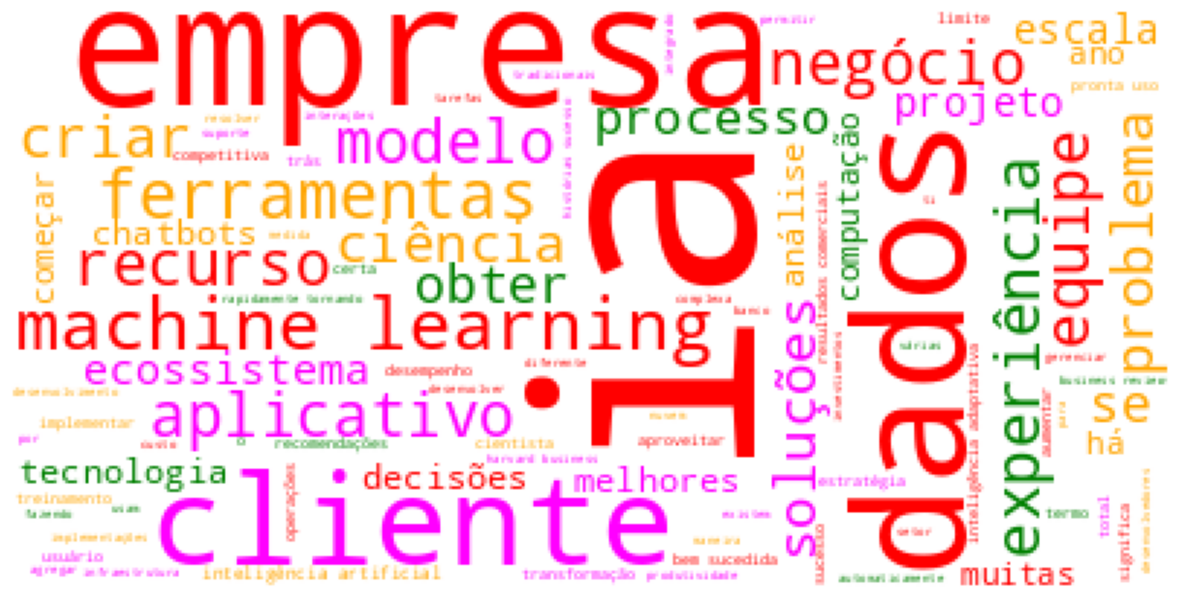

In [ ]:
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()